# Logistic Regression-1

Q1. Explain the difference between linear regression and logistic regression models. Provide an example of
a scenario where logistic regression would be more appropriate.

Ans. The basic difference between linear regression and logistic regression models is that in linear regression the target variable that is to be predicted is a **Numerical Feature**, it is continuous. But, logistic regression is used when the variable to be predicted is a **Categorical Feature**, it used to solve a classification problem. 

For example, suppose we are trying to build a machine learning model to classify inbox mails as Spam or Not Spam, then in this case we cannot use Linear Regression, we need to use Logistic Regression.


Q2. What is the cost function used in logistic regression, and how is it optimized?

Ans. The cost function used in Logistic Regression is as follows:
$$ J(\theta) = \frac{1}{n} \sum\limits_{i=1}^{n}\left(y_i - h_{\theta}(x_i)\right)^2 $$

where,

$$ h(\theta) = \frac{1}{1 + e^{-(\theta_0 + \theta_{1}x_1)}} $$

But this is non-convex so we define another loss function as:

$$ J(\theta_0,\theta_1) = 
\begin{cases}
\log(h_{\theta}(x)) \text{ if } y=1\\
\log(1-h_{\theta}(x)) \text{ if } y=0
\end{cases}
$$

this can be written as:
$$ J(\theta_0,\theta_1) = -y\log(h_{\theta}(x)) - (1-y)\log(1-h_{\theta}(x)) $$

where, $ h(\theta) = \frac{1}{1 + e^{-(\theta_0 + \theta_{1}x_1)}} $

This is called the log-loss function.

For optimizing it, we use the convergence algorithm and minimize the log-loss function:

Repeat until convergence:

>j=0,1

>$\theta_j = \theta_j - \alpha . \frac{\partial}{\partial{\theta_j}}J(\theta_0,\theta_1)$

Where 
- $J(\theta_0,\theta_1)$ is our cost/loss function, for example it can be the Mean Squared Error. 
- $\alpha$ is the learning rate


Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

Ans. Regularization is a set of techniques used in machine learning to prevent overfitting by adding a penalty to the model's loss function based on the complexity of the model. Regularization techniques encourage the model to have smaller parameter values, effectively reducing its capacity to fit noise in the training data and promoting better generalization to new, unseen data.

Suppose we have :
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x + ...$$

Suppose we use Mean Squared Error as our cost function:
$$ J(\theta) = \frac{1}{n} \sum\limits_{i=1}^{n}\left(y_i - h_{\theta}(x_i)\right)^2 $$

Common regularization techniques and the modified cost function is as follows:

- **L1 Regularization (Lasso):** L1 regularization adds a penalty term proportional to the absolute values of the model's parameters to the cost function. This can help in feature selection and reducing model complexity.
    
    The regularized function is: 
    
    $$ J(\theta) = -y\log(h_{\theta}(x)) - (1-y)\log(1-h_{\theta}(x)) + \lambda\sum\limits_{i=1}^{n}|\theta_{i}| $$


- **L2 Regularization (Ridge):** L2 regularization adds a penalty term proportional to the squared values of the model's parameters to the loss function. It encourages the model to have smaller but non-zero weight values for all features, distributing the influence more evenly across features.

    The regularized function is: 
    
    $$ J(\theta) = -y\log(h_{\theta}(x)) - (1-y)\log(1-h_{\theta}(x)) + \lambda\sum\limits_{i=1}^{n}(\theta_{i}) ^2$$

- **Elastic Net Regularization:** Elastic Net combines both L1 and L2 regularization. It adds a combination of L1 and L2 penalty terms to the loss function. This can provide a balance between the feature selection capability of L1 regularization and the even distribution of weights from L2 regularization.

    The regularized function is:
    
    $$ J(\theta) = -y\log(h_{\theta}(x)) - (1-y)\log(1-h_{\theta}(x)) + \lambda_1\sum\limits_{i=1}^{n}|\theta_{i}| + \lambda_2\sum\limits_{i=1}^{n}(\theta_{i}) ^2$$

where, $ h(\theta) = \frac{1}{1 + e^{-(\theta_0 + \theta_{1}x_1)}} $ and $\lambda$ is called **Hyper-parameter**


Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?

Ans. The ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of binary classification models, including logistic regression models. It helps to visualize and assess the trade-off between a model's true positive rate (sensitivity) and its false positive rate (1-specificity) across different probability thresholds.

To construct the ROC curve, you vary the threshold from 0 to 1. For each threshold value, you calculate the true positive rate (TPR) and false positive rate (FPR) as follows:

   - TPR (Sensitivity) = True Positives / (True Positives + False Negatives)
   - FPR (1-Specificity) = False Positives / (False Positives + True Negatives)

   True Positives (TP) are the instances correctly classified as positive, False Positives (FP) are the instances incorrectly classified as positive, True Negatives (TN) are the instances correctly classified as negative, and False Negatives (FN) are the instances incorrectly classified as negative.

We plot the TPR (Sensitivity) on the y-axis and the FPR (1-Specificity) on the x-axis. This results in a curve that typically starts at the point (0,0) and ends at (1,1). The diagonal line from (0,0) to (1,1) represents a random classifier with no predictive power.

**Evaluating Model Performance**: The shape of the ROC curve and its distance from the diagonal line provide insights into the performance of your logistic regression model:

   - A curve that is closer to the top-left corner (0,1) indicates better performance.
   - The area under the ROC curve (AUC-ROC) is a scalar value that summarizes the overall performance of the model. AUC-ROC values range from 0 to 1, with a higher value indicating better discrimination. An AUC-ROC of 0.5 suggests a model performs no better than random guessing, while an AUC-ROC of 1 represents a perfect classifier.

Example using random data is as follows:

In [3]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_classes=2, n_clusters_per_class=2)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=23)

from sklearn.linear_model import LogisticRegression

regressor=LogisticRegression()

regressor.fit(X_train, y_train)

y_pred=regressor.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(classification_report(y_pred=y_pred, y_true=y_test))

0.904
[[107  11]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       118
           1       0.92      0.90      0.91       132

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



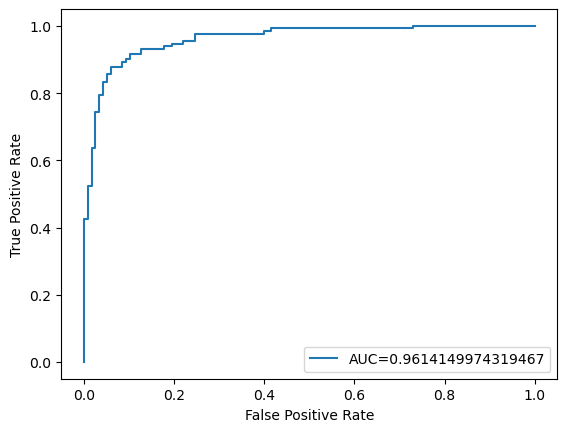

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#define metrics
y_pred_proba = regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The curve shows that our model predicts the data very well.

Q5. What are some common techniques for feature selection in logistic regression? How do these
techniques help improve the model's performance?

Ans. Feature selection is a crucial step in building a logistic regression model. It involves choosing a subset of the most relevant and informative features (predictors) from our dataset while discarding less important or redundant ones. Proper feature selection can help improve a logistic regression model's performance by reducing overfitting, reducing computational complexity, and potentially enhancing interpretability. Here are some common techniques for feature selection in logistic regression:

3. **L1 Regularization (Lasso)**: Lasso regularization adds a penalty term to the logistic regression objective function, encouraging some coefficients to be exactly zero. This effectively performs feature selection by setting some coefficients to zero, thus eliminating corresponding features.

4. **Tree-based Methods**: Decision tree-based algorithms like Random Forest and Gradient Boosting can be used to rank feature importance. Features with higher importance scores are considered more relevant.
   
5. **Filter Methods**: These methods evaluate feature relevance independently of the chosen model. Common filter methods include correlation analysis, mutual information, and variance thresholding.

7. **Feature Importance from Model Coefficients**: After fitting a logistic regression model, we can examine the coefficients of the features. Larger absolute coefficient values indicate more influential features.

How these techniques help improve the model's performance:

- **Reduced Overfitting**: By eliminating irrelevant or noisy features, feature selection reduces the risk of overfitting, where the model performs well on the training data but poorly on new, unseen data.

- **Improved Model Interpretability**: A model with fewer features is often easier to interpret, making it more useful for explaining the relationships between predictors and the target variable.

- **Reduced Computational Complexity**: Fewer features mean faster training and prediction times, which can be important for large datasets or real-time applications.

- **Enhanced Generalization**: By focusing on the most informative features, feature selection can improve the model's ability to generalize patterns to new data.


Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing
with class imbalance?

Ans. Handling imbalanced datasets in logistic regression or any other machine learning model is crucial because when one class significantly outnumbers the other, the model tends to be biased towards the majority class. This can lead to poor performance, where the minority class is often misclassified. Here are some strategies for dealing with class imbalance in logistic regression:

1. **Resampling Techniques**:
   - **Oversampling**: This involves increasing the number of instances in the minority class by duplicating or generating synthetic samples. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic data points to balance the class distribution.
   - **Undersampling**: Undersampling reduces the number of instances in the majority class to match the minority class. While it reduces the dataset size, it may result in information loss.

2. **Weighted Loss Function**: Logistic regression allows us to assign different weights to classes. By assigning higher weights to the minority class, we can make the model more sensitive to it. Many machine learning libraries, like scikit-learn, provide an option to specify class weights.

3. **Algorithmic Approaches**: Some machine learning algorithms are inherently robust to class imbalance. For instance, decision tree-based methods like Random Forest can handle imbalanced datasets better due to their ability to consider feature importance and make more balanced splits.

7. **Collect More Data**: If feasible, collecting more data for the minority class can help balance the dataset. However, this may not always be possible or cost-effective.

9. **Threshold Adjustment**: Experiment with different probability thresholds for classification. By adjusting the threshold, you can trade off precision and recall to suit your specific application's needs.


Q7. Can you discuss some common issues and challenges that may arise when implementing logistic
regression, and how they can be addressed? For example, what can be done if there is multicollinearity
among the independent variables?

Ans. Implementing logistic regression can come with various challenges and issues. Here are some common ones and strategies to address them:

1. **Multicollinearity**:
   - **Issue**: Multicollinearity occurs when two or more independent variables in the logistic regression model are highly correlated with each other. This can make it challenging to determine the individual effect of each variable on the target.
   - **Solution**: 
     - Identify and assess the degree of multicollinearity using correlation matrices. Variables with high collinearity may need to be removed or combined.
     - If retaining all variables is necessary, consider regularization techniques like L2 regularization (Ridge) or L1 regularization (Lasso) to mitigate multicollinearity by shrinking coefficients.

2. **Overfitting**:
   - **Issue**: Overfitting occurs when the logistic regression model captures noise in the training data, resulting in poor generalization to unseen data.
   - **Solution**:
     - Use regularization techniques like L1 or L2 regularization to penalize large coefficients, preventing the model from fitting the noise in the data.
     - Employ cross-validation to assess model performance and select hyperparameters, such as the regularization strength.
     - Collect more data if possible, as larger datasets can help reduce overfitting.

3. **Class Imbalance**:
   - **Issue**: When dealing with imbalanced datasets, logistic regression may bias predictions toward the majority class.
   - **Solution**:
     - Implement strategies for dealing with class imbalance, such as resampling techniques (oversampling or undersampling), weighted loss functions, or ensemble methods.
     - Choose appropriate evaluation metrics like precision, recall, F1-score, or area under the Precision-Recall curve to better assess model performance.

4. **Non-Linear Relationships**:
   - **Issue**: Logistic regression assumes a linear relationship between independent variables and the log-odds of the target variable. If relationships are non-linear, the model may perform poorly.
   - **Solution**:
     - Transform independent variables or create polynomial features to capture non-linear relationships.
     - Consider using more complex models, such as decision trees or nonlinear regression, if logistic regression cannot adequately capture the underlying relationships.

5. **Outliers**:
   - **Issue**: Outliers can have a significant impact on logistic regression coefficients and predictions.
   - **Solution**:
     - Identify and handle outliers by visual inspection, statistical tests, or using robust regression techniques.
     - Consider using robust loss functions, such as Huber loss, which are less sensitive to outliers.

6. **Feature Selection**:
   - **Issue**: Selecting the right set of features is critical for model performance and interpretability.
   - **Solution**:
     - Use feature selection techniques to identify and retain the most relevant features while discarding less informative ones.
     - Experiment with different feature selection methods like recursive feature elimination (RFE) or feature importance from tree-based models.

7. **Sample Size**:
   - **Issue**: Logistic regression models may require a larger sample size to produce stable and reliable results, particularly when dealing with many predictors.
   - **Solution**: If increasing the sample size is not possible, consider reducing the number of predictors through feature selection or dimensionality reduction techniques like PCA (Principal Component Analysis).
